# 시계열 데이터 시각화

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
sw = pd.read_csv('seattle-weather.csv')

In [3]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
sw['date'] = pd.to_datetime(sw['date'])
sw = sw.set_index('date')

In [5]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [6]:
sw

# 2012.1.1 부터 2015.12.31년까지 4년간의 기온 데이터를 담은 데이터셋

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [7]:
date_list = ['2012-01-01', '2012-07-01', '2013-01-01', '2013-07-01', '2014-01-01', '2014-07-01', '2015-01-01', '2015-07-01', '2015-12-31']

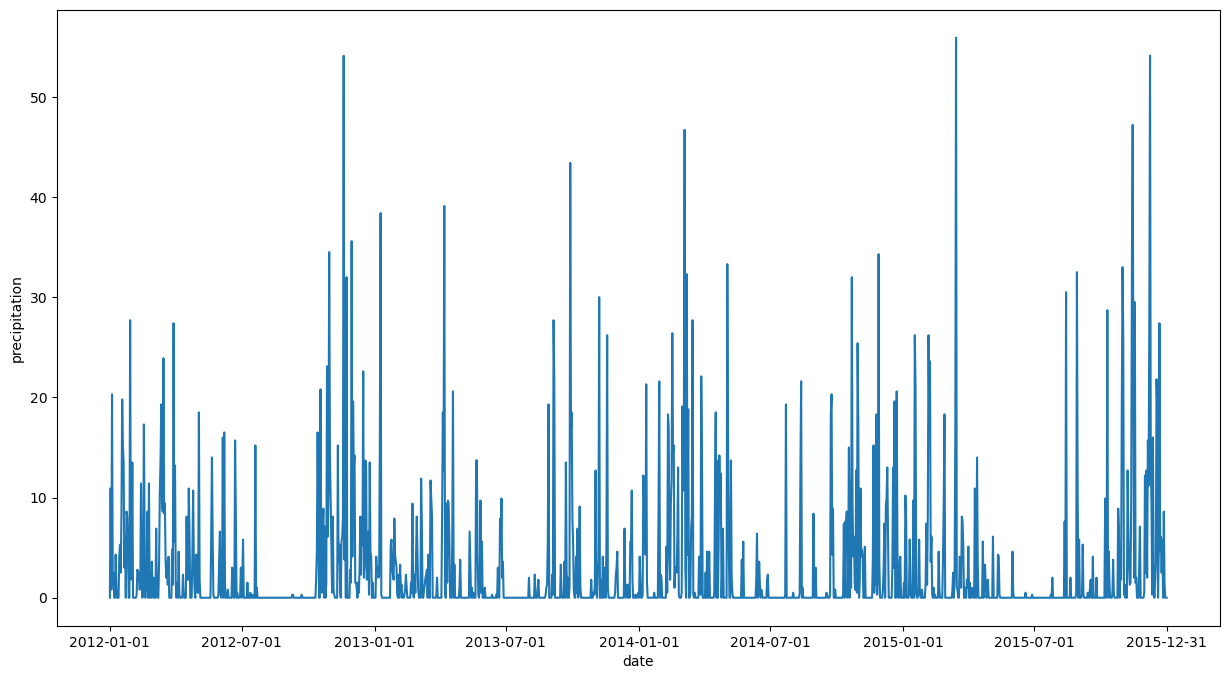

In [8]:
plt.figure(figsize = (15,8))
plt.plot(sw['precipitation'])
plt.xlabel('date')
plt.ylabel('precipitation')
plt.xticks(date_list)
plt.show()

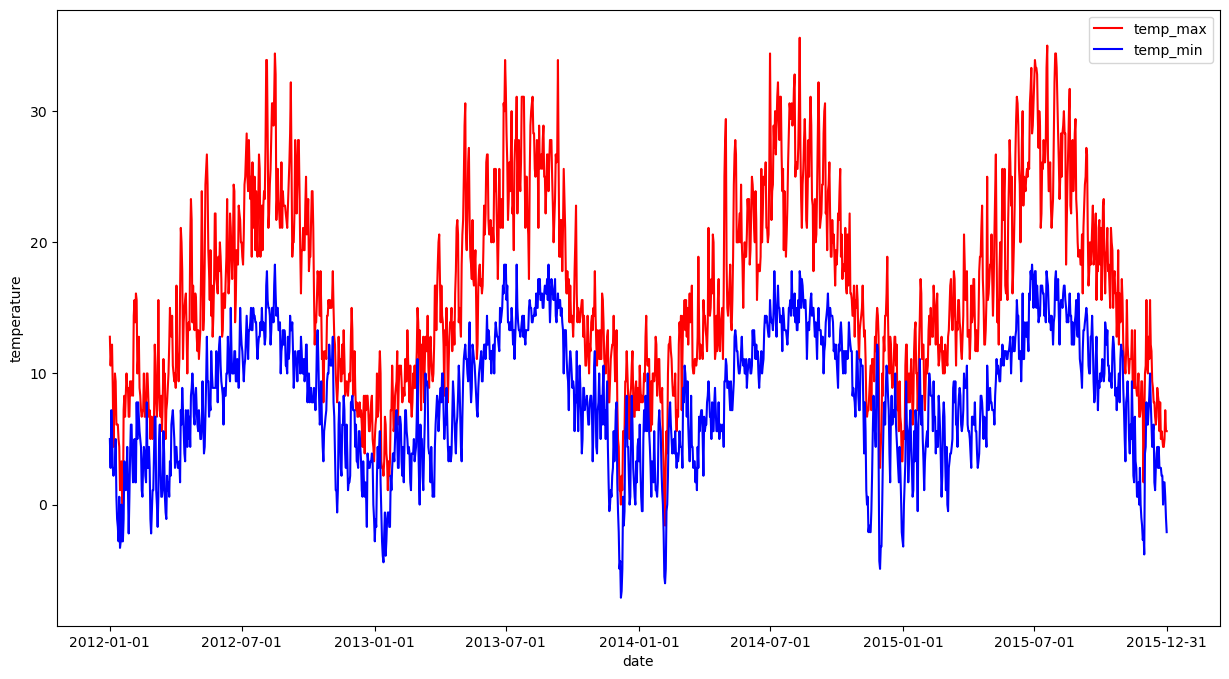

In [12]:
plt.figure(figsize = (15,8))
plt.plot(sw['temp_max'], color = 'r', label = 'temp_max')
plt.plot(sw['temp_min'], color = 'b', label = 'temp_min')
plt.xlabel('date')
plt.ylabel('temperature')
plt.xticks(date_list)
plt.legend()
plt.show()

# 최고기온, 최저기온 모두 1년을 주기로 패턴을 보이고 있음

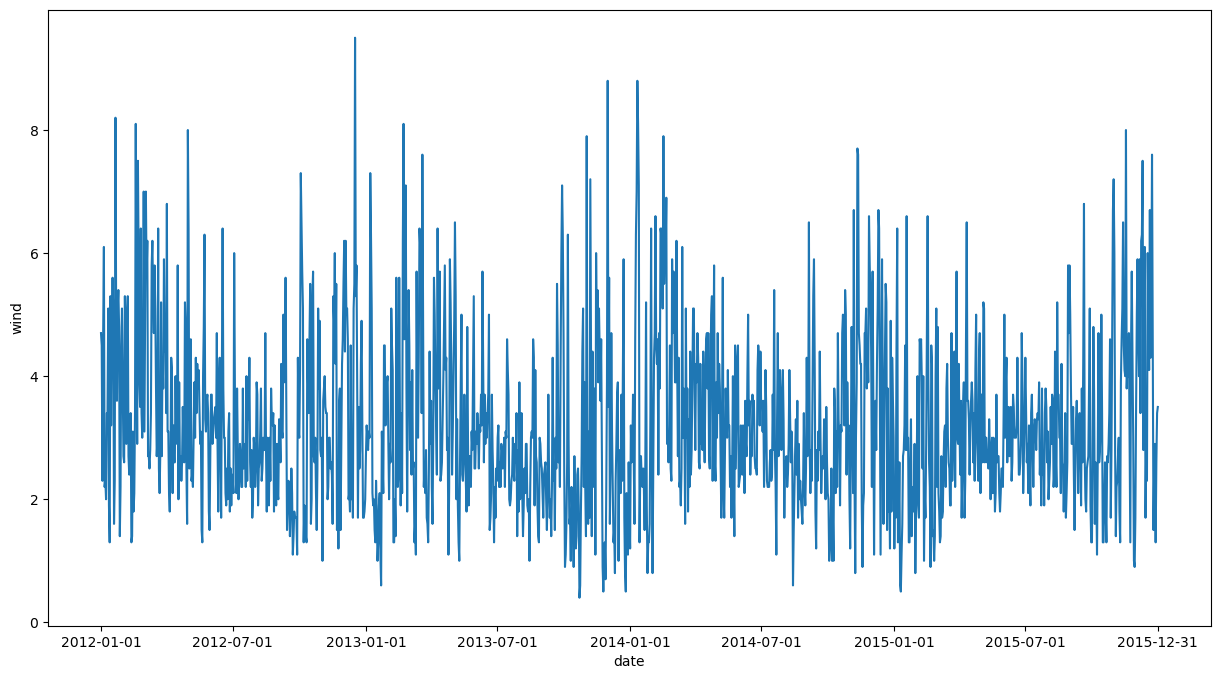

In [13]:
plt.figure(figsize = (15,8))
plt.plot(sw['wind'])
plt.xlabel('date')
plt.ylabel('wind')
plt.xticks(date_list)
plt.show()

# 풍속은 1년 주기로 우하향하는 경향을 보임

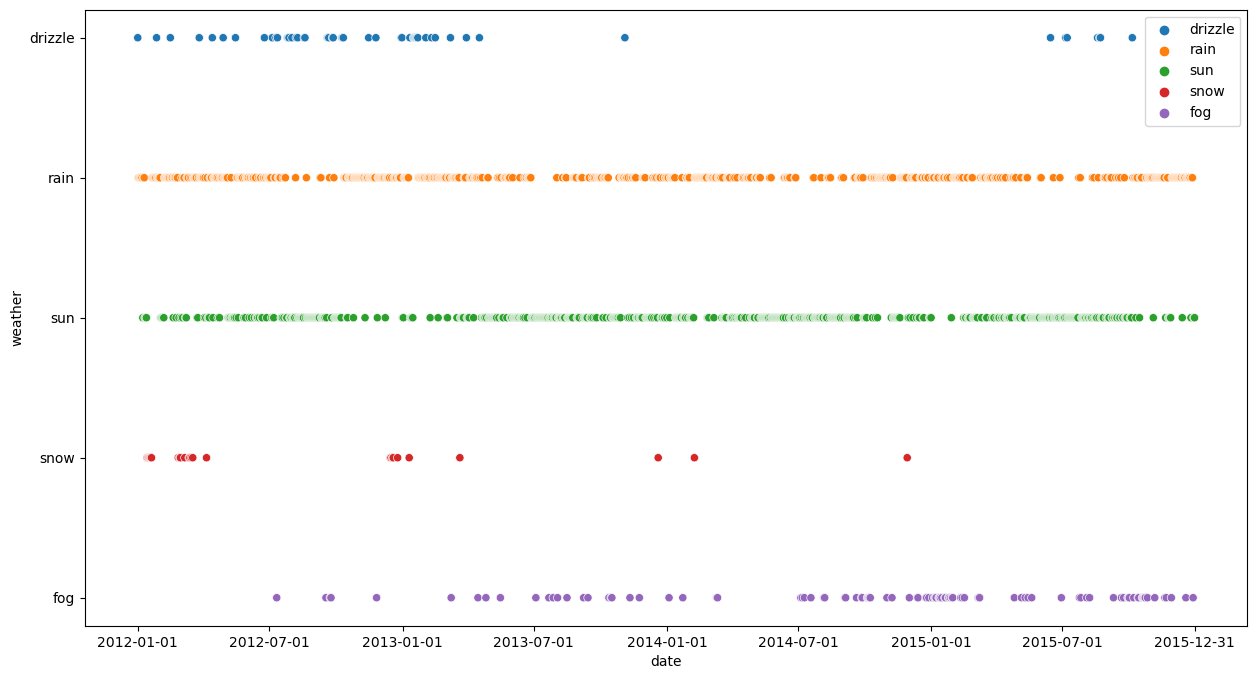

In [14]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = sw, x = 'date', y = 'weather', hue = 'weather')
plt.xticks(date_list)
plt.legend(loc = 'upper right')

# drizzle은 2012~2013년에 , fog는 2013~2015년에 빈도가 높음

## 변수 간의 관계 알아보기

array([[<Axes: xlabel='precipitation', ylabel='precipitation'>,
        <Axes: xlabel='temp_max', ylabel='precipitation'>,
        <Axes: xlabel='temp_min', ylabel='precipitation'>,
        <Axes: xlabel='wind', ylabel='precipitation'>],
       [<Axes: xlabel='precipitation', ylabel='temp_max'>,
        <Axes: xlabel='temp_max', ylabel='temp_max'>,
        <Axes: xlabel='temp_min', ylabel='temp_max'>,
        <Axes: xlabel='wind', ylabel='temp_max'>],
       [<Axes: xlabel='precipitation', ylabel='temp_min'>,
        <Axes: xlabel='temp_max', ylabel='temp_min'>,
        <Axes: xlabel='temp_min', ylabel='temp_min'>,
        <Axes: xlabel='wind', ylabel='temp_min'>],
       [<Axes: xlabel='precipitation', ylabel='wind'>,
        <Axes: xlabel='temp_max', ylabel='wind'>,
        <Axes: xlabel='temp_min', ylabel='wind'>,
        <Axes: xlabel='wind', ylabel='wind'>]], dtype=object)

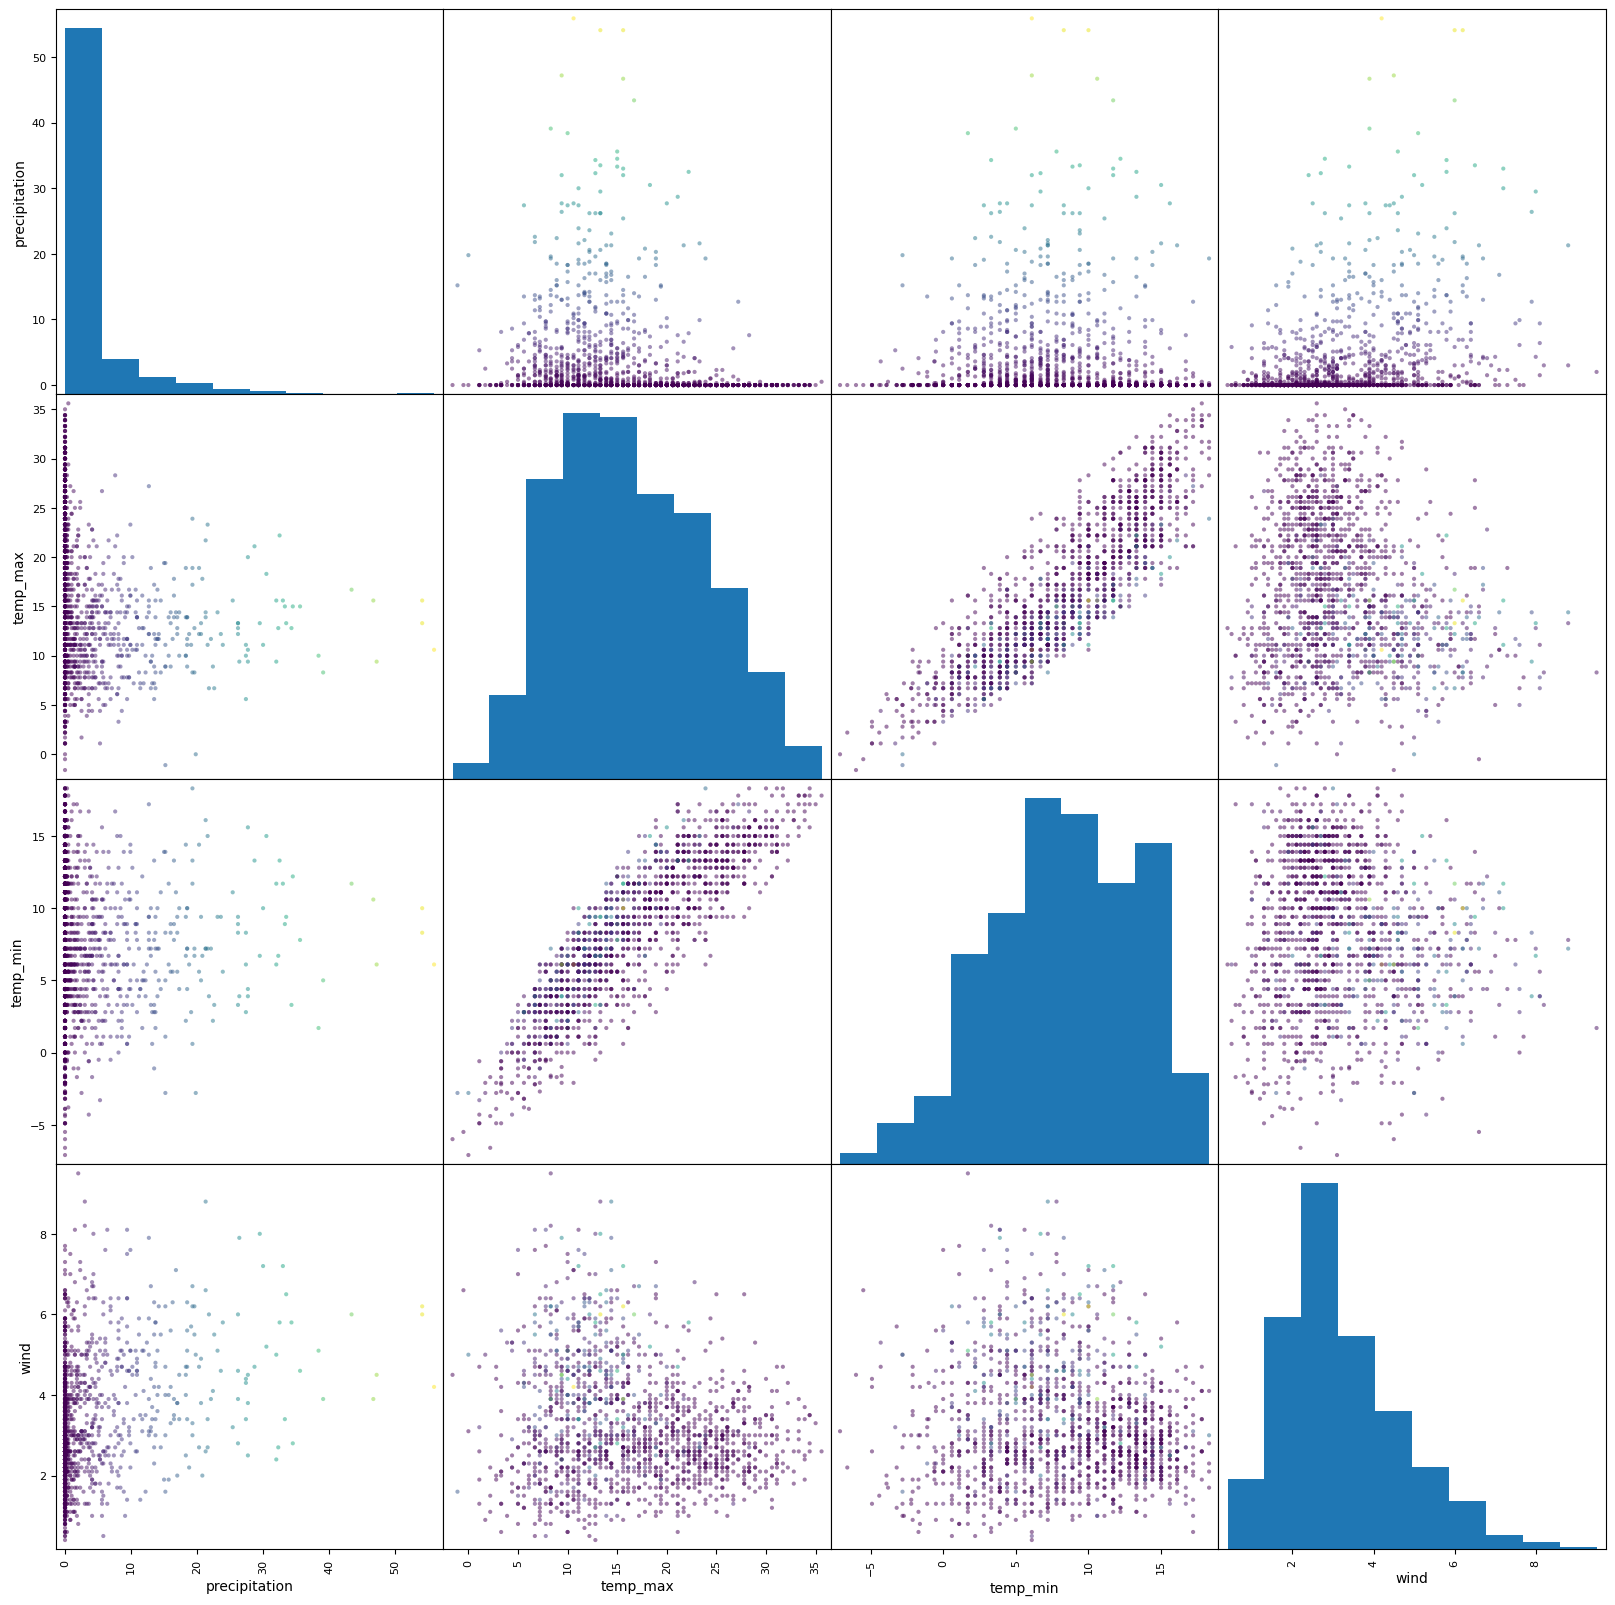

In [15]:
pd.plotting.scatter_matrix(sw, c = sw['precipitation'], figsize = (20,20))

- 이 차트만으로는 변수간의 상관관계를 파악하기에는 다소 어렵다

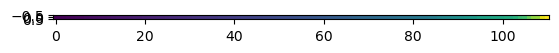

In [16]:
plt.imshow([np.unique(sw['precipitation'])])

## weather 컬럼 원핫 인코딩

In [9]:
weather = pd.get_dummies(sw['weather'])

In [10]:
df = pd.concat([sw, weather], axis = 1)

In [11]:
df

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,rain,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,rain,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,rain,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,rain,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain,0,0,1,0,0
2015-12-28,1.5,5.0,1.7,1.3,rain,0,0,1,0,0
2015-12-29,0.0,7.2,0.6,2.6,fog,0,1,0,0,0


In [12]:
# 기존 weather 컬럼 삭제
df.drop(['weather'], axis = 1, inplace = True)

In [13]:
df

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,0,0,1,0,0
2015-12-28,1.5,5.0,1.7,1.3,0,0,1,0,0
2015-12-29,0.0,7.2,0.6,2.6,0,1,0,0,0


# 시계열 데이터 결측치 처리

In [14]:
df_x = df[['temp_max','temp_min','wind','drizzle', 'fog', 'rain', 'snow', 'sun']]

In [15]:
msv = np.random.randint(0, 1461, size = 100)

In [16]:
df_x.iloc[msv] = np.nan

In [17]:
df_x.head(50)

,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
date,,,,,,,,
2012-01-01,12.8,5.0,4.7,1.0,0.0,0.0,0.0,0.0
2012-01-02,10.6,2.8,4.5,0.0,0.0,1.0,0.0,0.0
2012-01-03,11.7,7.2,2.3,0.0,0.0,1.0,0.0,0.0
2012-01-04,12.2,5.6,4.7,0.0,0.0,1.0,0.0,0.0
2012-01-05,8.9,2.8,6.1,0.0,0.0,1.0,0.0,0.0
2012-01-06,4.4,2.2,2.2,0.0,0.0,1.0,0.0,0.0
2012-01-07,7.2,2.8,2.3,0.0,0.0,1.0,0.0,0.0
2012-01-08,10.0,2.8,2.0,0.0,0.0,0.0,0.0,1.0
2012-01-09,9.4,5.0,3.4,0.0,0.0,1.0,0.0,0.0


In [55]:
df_x = pd.concat([df_x, sw['precipitation']], axis = 1)

In [66]:
df_x

,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun,precipitation
date,,,,,,,,,
2012-01-01,12.8,5.0,4.7,1.0,0.0,0.0,0.0,0.0,0.0
2012-01-02,10.6,2.8,4.5,0.0,0.0,1.0,0.0,0.0,10.9
2012-01-03,11.7,7.2,2.3,0.0,0.0,1.0,0.0,0.0,0.8
2012-01-04,12.2,5.6,4.7,0.0,0.0,1.0,0.0,0.0,20.3
2012-01-05,8.9,2.8,6.1,0.0,0.0,1.0,0.0,0.0,1.3
...,...,...,...,...,...,...,...,...,...
2015-12-27,4.4,1.7,2.9,0.0,0.0,1.0,0.0,0.0,8.6
2015-12-28,5.0,1.7,1.3,0.0,0.0,1.0,0.0,0.0,1.5
2015-12-29,7.2,0.6,2.6,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
df0 = df_x.copy()
df1 = df_x.copy()
df2 = df_x.copy()
df3 = df_x.copy()
df4 = df_x.copy()

## 0. 평균으로 대체

In [68]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [69]:
imp_mean = imp_mean.fit_transform(df0)

In [70]:
imp_mean = pd.DataFrame(imp_mean)

In [71]:
imp_mean.columns = df_x.columns

In [72]:
x_train = imp_mean.drop('precipitation', axis = 1).iloc[0:1021]
x_test = imp_mean.drop('precipitation', axis = 1).iloc[1021:]
y_train = imp_mean['precipitation'][:1021]
y_test = imp_mean['precipitation'][1021:]

In [73]:
fit_train0 = sm.OLS(y_train, x_train)

In [74]:
fit_train0 = fit_train0.fit()

In [75]:
y_mean_pred = fit_train0.predict(x_test)

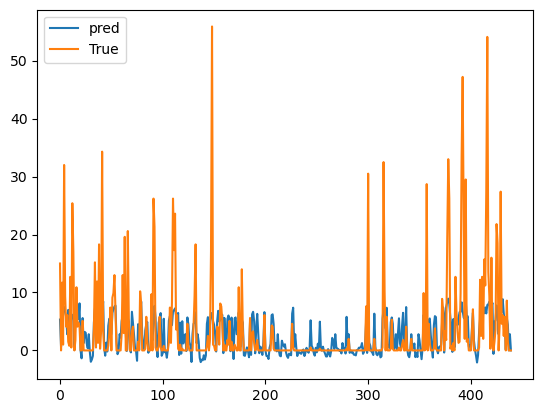

In [76]:
plt.plot(np.array(y_mean_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [78]:
mse0 = mean_squared_error(y_true = y_test, y_pred = y_mean_pred)
print(mse0)

42.40327744729975


## 1. 최빈값으로 대체

In [79]:
imp_freq = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [80]:
imp_freq = imp_freq.fit_transform(df1)

In [81]:
imp_freq = pd.DataFrame(imp_freq)

In [82]:
imp_freq.columns = df_x.columns

In [83]:
imp_freq.head(50)

,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun,precipitation
0,12.8,5.0,4.7,1.0,0.0,0.0,0.0,0.0,0.0
1,10.6,2.8,4.5,0.0,0.0,1.0,0.0,0.0,10.9
2,11.7,7.2,2.3,0.0,0.0,1.0,0.0,0.0,0.8
3,12.2,5.6,4.7,0.0,0.0,1.0,0.0,0.0,20.3
4,8.9,2.8,6.1,0.0,0.0,1.0,0.0,0.0,1.3
5,4.4,2.2,2.2,0.0,0.0,1.0,0.0,0.0,2.5
6,7.2,2.8,2.3,0.0,0.0,1.0,0.0,0.0,0.0
7,10.0,2.8,2.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9.4,5.0,3.4,0.0,0.0,1.0,0.0,0.0,4.3
9,6.1,0.6,3.4,0.0,0.0,1.0,0.0,0.0,1.0


In [84]:
x_train = imp_freq.drop('precipitation', axis = 1).iloc[0:1021]
x_test = imp_freq.drop('precipitation', axis = 1).iloc[1021:]
y_train = imp_freq['precipitation'][:1021]
y_test = imp_freq['precipitation'][1021:]

In [85]:
fit_train1 = sm.OLS(y_train, x_train)

In [86]:
fit_train1 = fit_train1.fit()

In [87]:
y_freq_pred = fit_train1.predict(x_test)

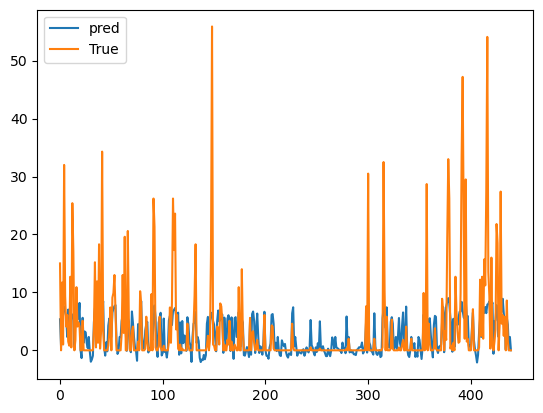

In [88]:
plt.plot(np.array(y_freq_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [89]:
mse1 = mean_squared_error(y_true = y_test, y_pred = y_freq_pred)
print(mse1)

42.26568154394468


## 2. interpolation으로 대체

In [20]:
df2 = df2.interpolate(method = 'linear')

In [23]:
df2.head(50)

,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
date,,,,,,,,
2012-01-01,12.800000,5.00,4.700000,1.0,0.0,0.000000,0.0,0.000000
2012-01-02,10.600000,2.80,4.500000,0.0,0.0,1.000000,0.0,0.000000
2012-01-03,11.700000,7.20,2.300000,0.0,0.0,1.000000,0.0,0.000000
2012-01-04,12.200000,5.60,4.700000,0.0,0.0,1.000000,0.0,0.000000
2012-01-05,8.900000,2.80,6.100000,0.0,0.0,1.000000,0.0,0.000000
2012-01-06,4.400000,2.20,2.200000,0.0,0.0,1.000000,0.0,0.000000
2012-01-07,7.200000,2.80,2.300000,0.0,0.0,1.000000,0.0,0.000000
2012-01-08,10.000000,2.80,2.000000,0.0,0.0,0.000000,0.0,1.000000
2012-01-09,9.400000,5.00,3.400000,0.0,0.0,1.000000,0.0,0.000000


In [92]:
x_train = df2.drop('precipitation', axis = 1).iloc[0:1021]
x_test = df2.drop('precipitation', axis = 1).iloc[1021:]
y_train = df2['precipitation'][:1021]
y_test = df2['precipitation'][1021:]

In [93]:
# 모델 학습
fit_train2 = sm.OLS(y_train, x_train)

In [94]:
fit_train2 = fit_train2.fit()

In [95]:
# 모델 예측
y_sp_pred = fit_train1.predict(x_test)

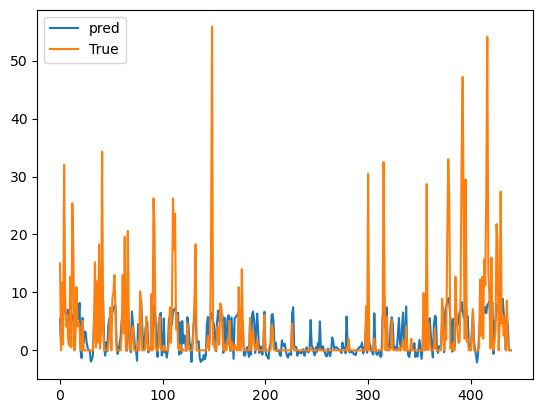

In [96]:
plt.plot(np.array(y_sp_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [97]:
mse2 = mean_squared_error(y_true = y_test, y_pred = y_sp_pred)
print(mse2)

42.30434831028218


## 2.1 interpolation (method = 'cubic')

In [98]:
df4 = df4.interpolate(method = 'cubic')

In [99]:
x_train = df4.drop('precipitation', axis = 1).iloc[0:1021]
x_test = df4.drop('precipitation', axis = 1).iloc[1021:]
y_train = df4['precipitation'][:1021]
y_test = df4['precipitation'][1021:]

In [100]:
fit_train4 = sm.OLS(y_train, x_train)

In [101]:
fit_train4 = fit_train4.fit()

In [102]:
y_sp_pred = fit_train4.predict(x_test)

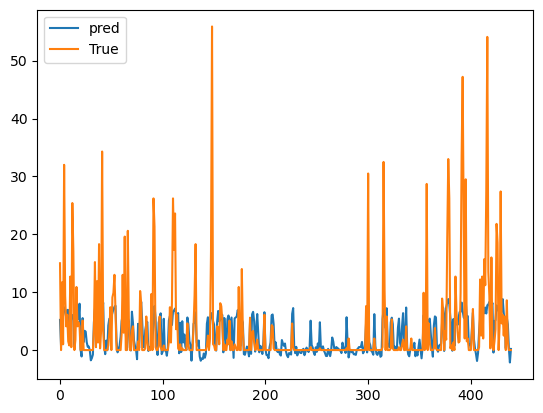

In [103]:
plt.plot(np.array(y_sp_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [104]:
mse4 = mean_squared_error(y_true = y_test, y_pred = y_sp_pred)
print(mse4)

42.626429633900685


## 3. IterativeImputer으로 대체

In [105]:
imputer = IterativeImputer(imputation_order = 'descending',
                           max_iter = 10, random_state = 111, # max_iter -> 반복 수
                           n_nearest_features = 8) # 예측을 위해 사용하는 feature 수

df3 = imputer.fit_transform(df3)

In [106]:
df3 = pd.DataFrame(df3)

In [107]:
df3.columns = df_x.columns

In [108]:
x_train = df3.drop('precipitation', axis = 1).iloc[0:1021]
x_test = df3.drop('precipitation', axis = 1).iloc[1021:]
y_train = df3['precipitation'][:1021]
y_test = df3['precipitation'][1021:]

In [109]:
fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

In [110]:
y_im_pred = fit_train1.predict(x_test)

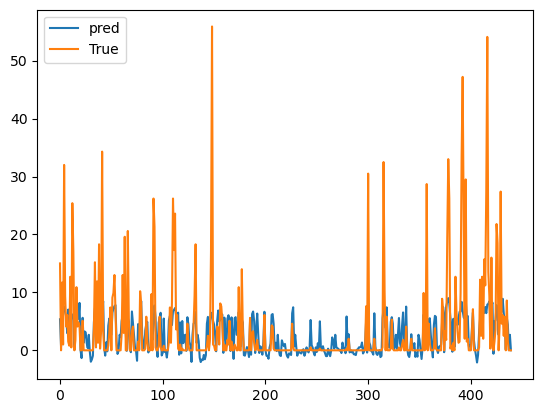

In [111]:
plt.plot(np.array(y_im_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [112]:
mse3 = mean_squared_error(y_true = y_test, y_pred = y_im_pred)
print(mse3)

42.220763404856505


# 정리

- 평균 mse : 42.682953198540176
- 최빈값 mse : 42.682953198540176
- 선형보간 mse : 41.907391433672025
- 삼차보간 mse : 42.37207193320381
- iterative imputer mse : 42.5718395268445